---
# Data Science and Artificial Intelliegence Practicum
## 5-modul. Machine Learning
---

## 5.12 - Decision Tree

### Imports and loading data

In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(URL)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


### Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Encoding categorical values.

In [4]:
lab_enc = LabelEncoder()

df['Sex'] = lab_enc.fit_transform(df['Sex'])
df['BP'] = lab_enc.fit_transform(df['BP'])
df['Cholesterol'] = lab_enc.fit_transform(df['Cholesterol'])

df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
165,38,1,1,0,18.295,drugY
196,16,1,1,0,12.006,drugC
39,15,1,2,0,9.084,drugX
144,39,1,0,0,9.664,drugA
134,42,0,0,0,21.036,drugY
40,73,0,2,0,19.221,drugY
69,18,0,0,1,24.276,drugY
137,35,0,0,0,12.894,drugA
78,19,0,0,0,13.313,drugA
117,40,0,2,0,10.103,drugX


### Data Preprocessing

In [5]:
X = df.drop(columns=['Drug'])
y = df['Drug']

print(f'{X.shape}')
print(f'{y.shape}')

(200, 5)
(200,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

print(f'{X_train.shape}')
print(f'{y_train.shape}')
print(f'{X_test.shape}')
print(f'{y_test.shape}')

(160, 5)
(160,)
(40, 5)
(40,)


### Modeling

In [7]:
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

### Evaluation

In [8]:
y_pred = tree_model.predict(X_test)

In [9]:
print("Classification Report for Decision Tree:\n", metrics.classification_report(y_test, y_pred))

Classification Report for Decision Tree:
               precision    recall  f1-score   support

       drugA       0.67      1.00      0.80         2
       drugB       1.00      0.80      0.89         5
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        14
       drugY       1.00      1.00      1.00        16

    accuracy                           0.97        40
   macro avg       0.93      0.96      0.94        40
weighted avg       0.98      0.97      0.98        40



In [10]:
print("Decision Tree model accuracy:", metrics.accuracy_score(y_test, y_pred))

Decision Tree model accuracy: 0.975


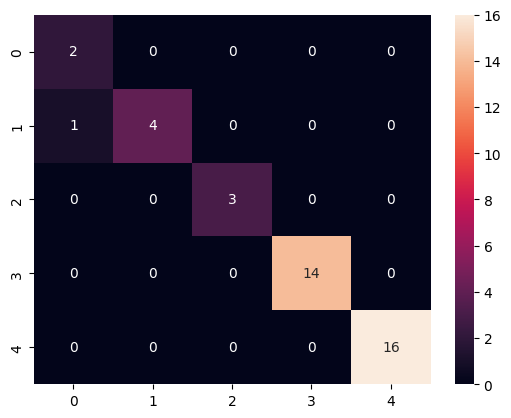

In [11]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True);

#### Cross-validation

In [12]:
cv_predict = cross_val_predict(estimator=tree_model, X=X, y=y, cv=5)
print("Classification Report for Cross-validation:\n", metrics.classification_report(y, cv_predict))

Classification Report for Cross-validation:
               precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



### Visualizing Decision Tree

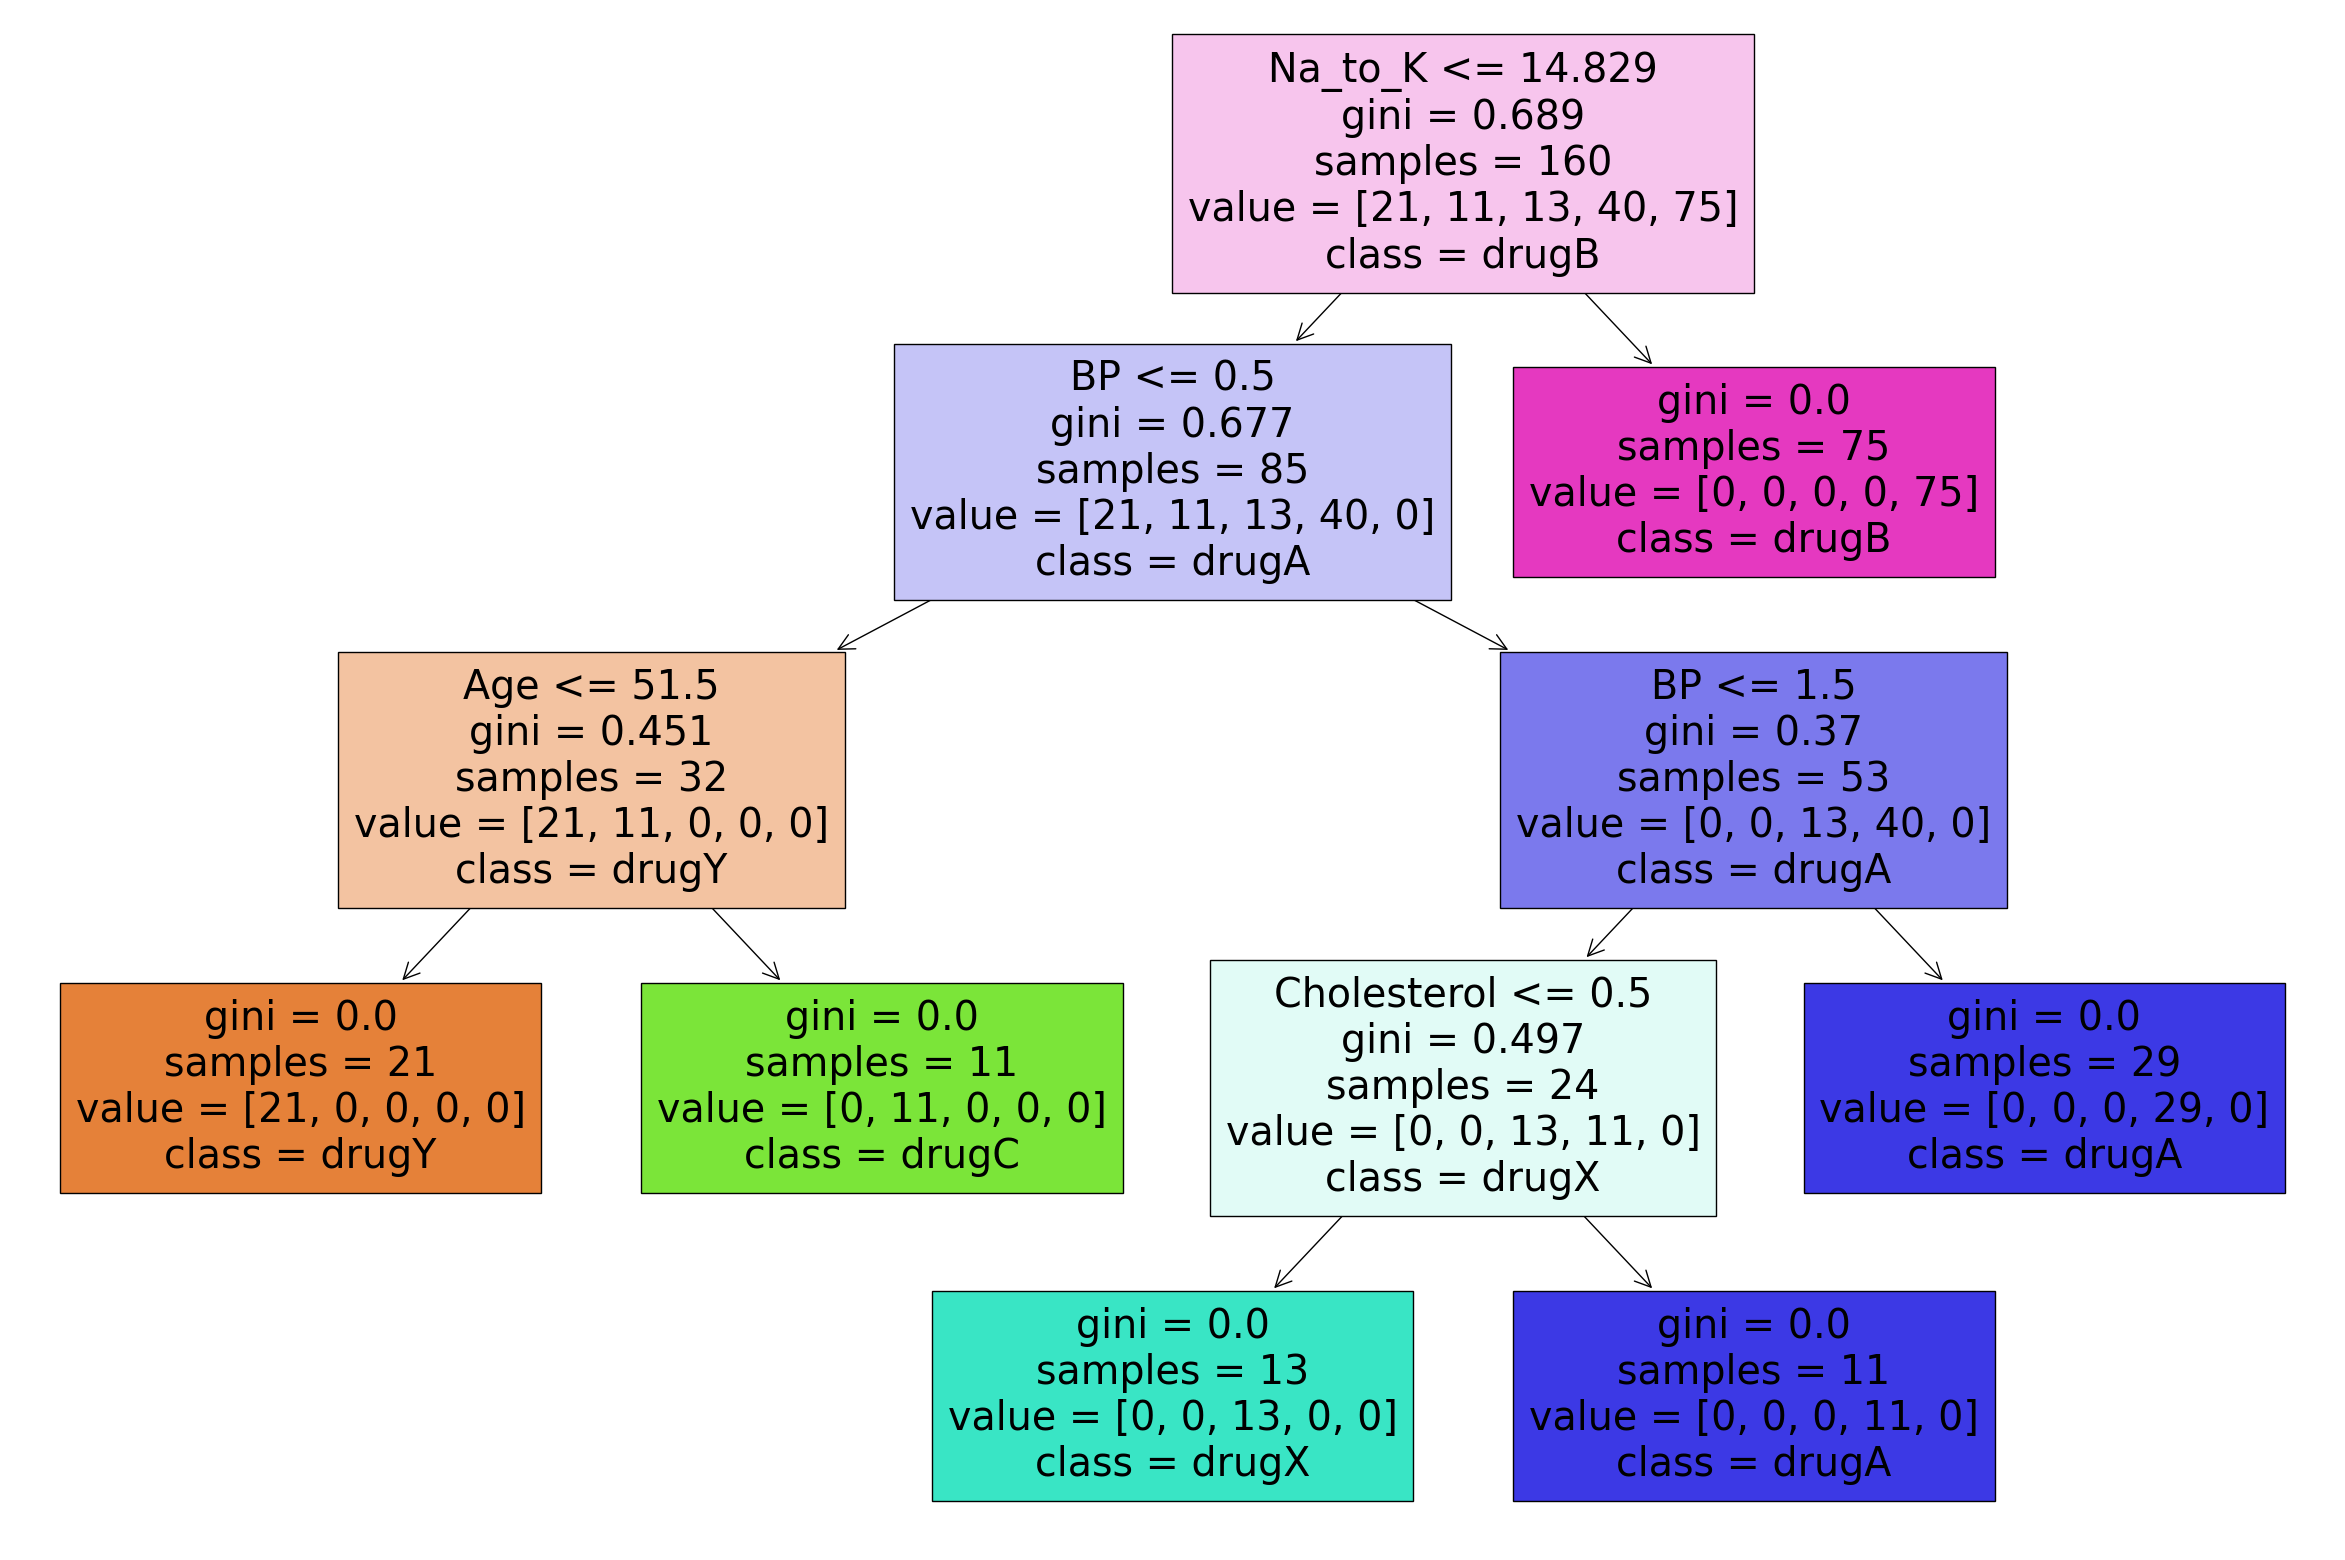

In [13]:
cols = X.columns
classes = y.unique()

plt.figure(figsize=[30, 20])
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

### Hyperparameters

Every model comes with its own **hyperparameter**, we can modify those parameters in order to improve model accuracy, effeciency or speed. In *k-nearest neighbors* algorithm it was `k` that is the *number of neighbors*. In *Decision Tree* we have several hyperparameters: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier

#### **`min_impurity_decrease`: *float, default=0.0***
A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

Decision Tree model accuracy: 0.9


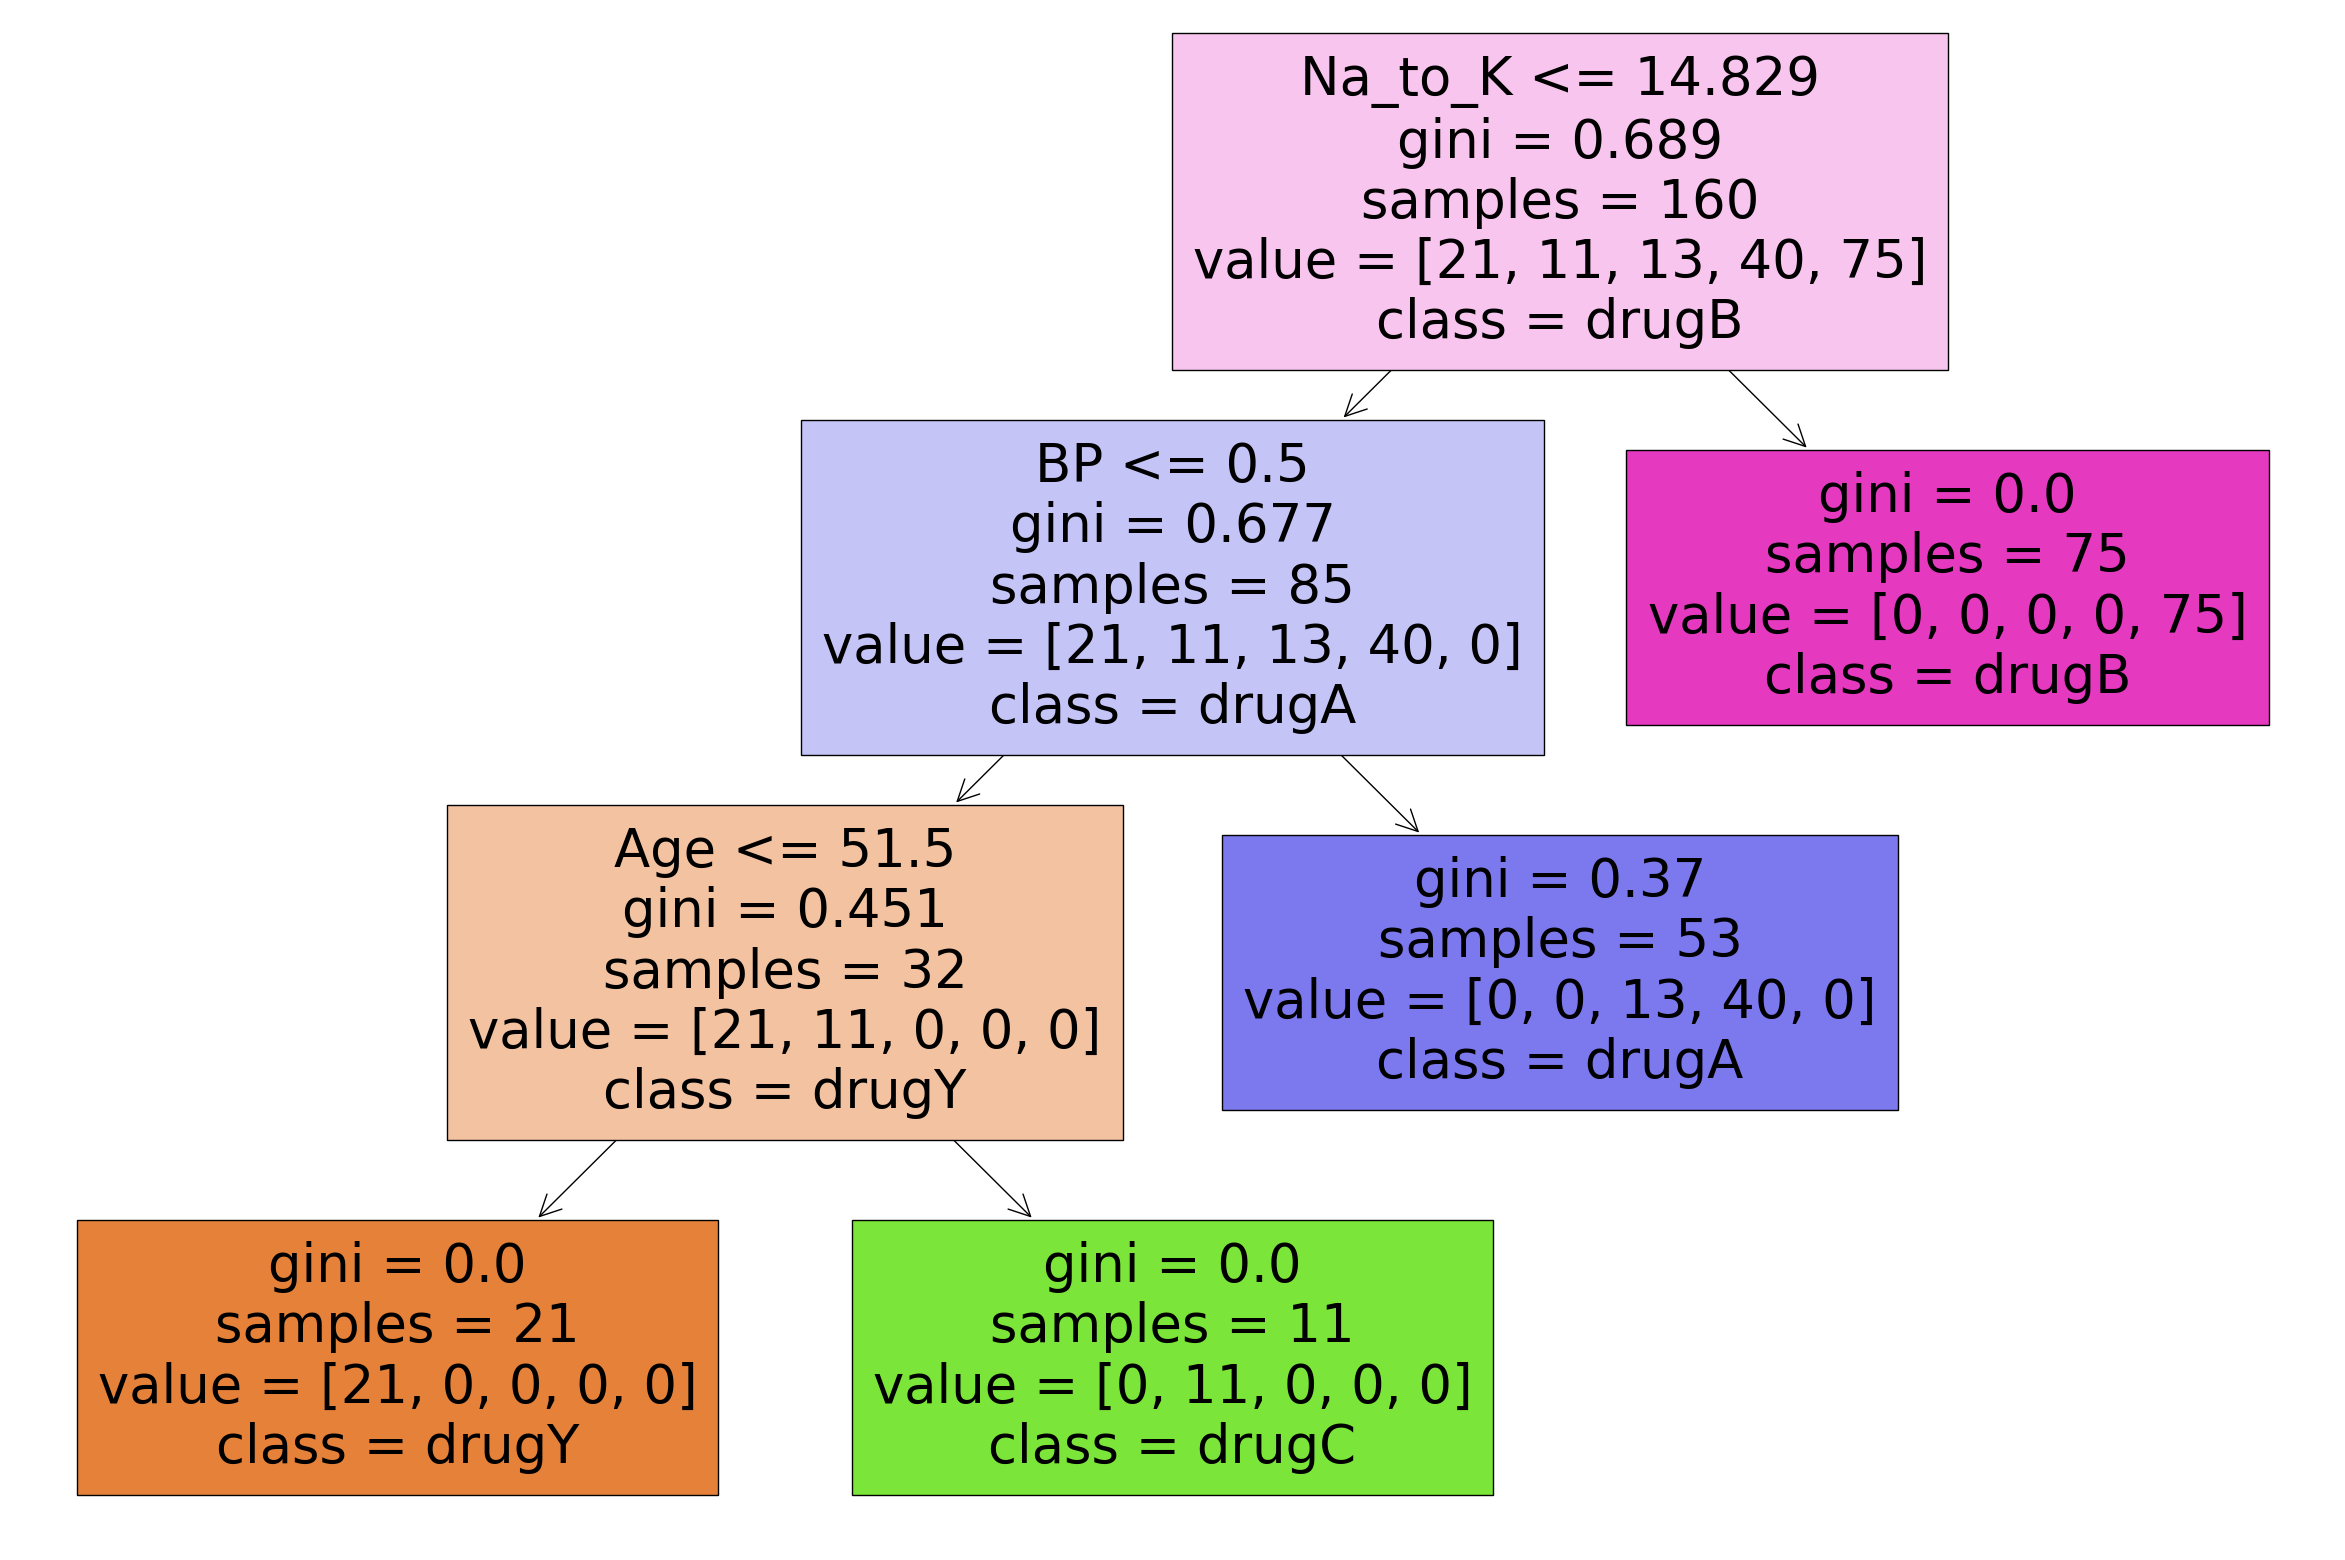

In [14]:
tree_model = tree.DecisionTreeClassifier(min_impurity_decrease=0.05)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
print("Decision Tree model accuracy:", metrics.accuracy_score(y_test, y_pred))

plt.figure(figsize=[30, 20])
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

#### **`max_depth`: *int, default=None***
The maximum depth(level) of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than *min_samples_split* samples.

Decision Tree model accuracy: 0.8


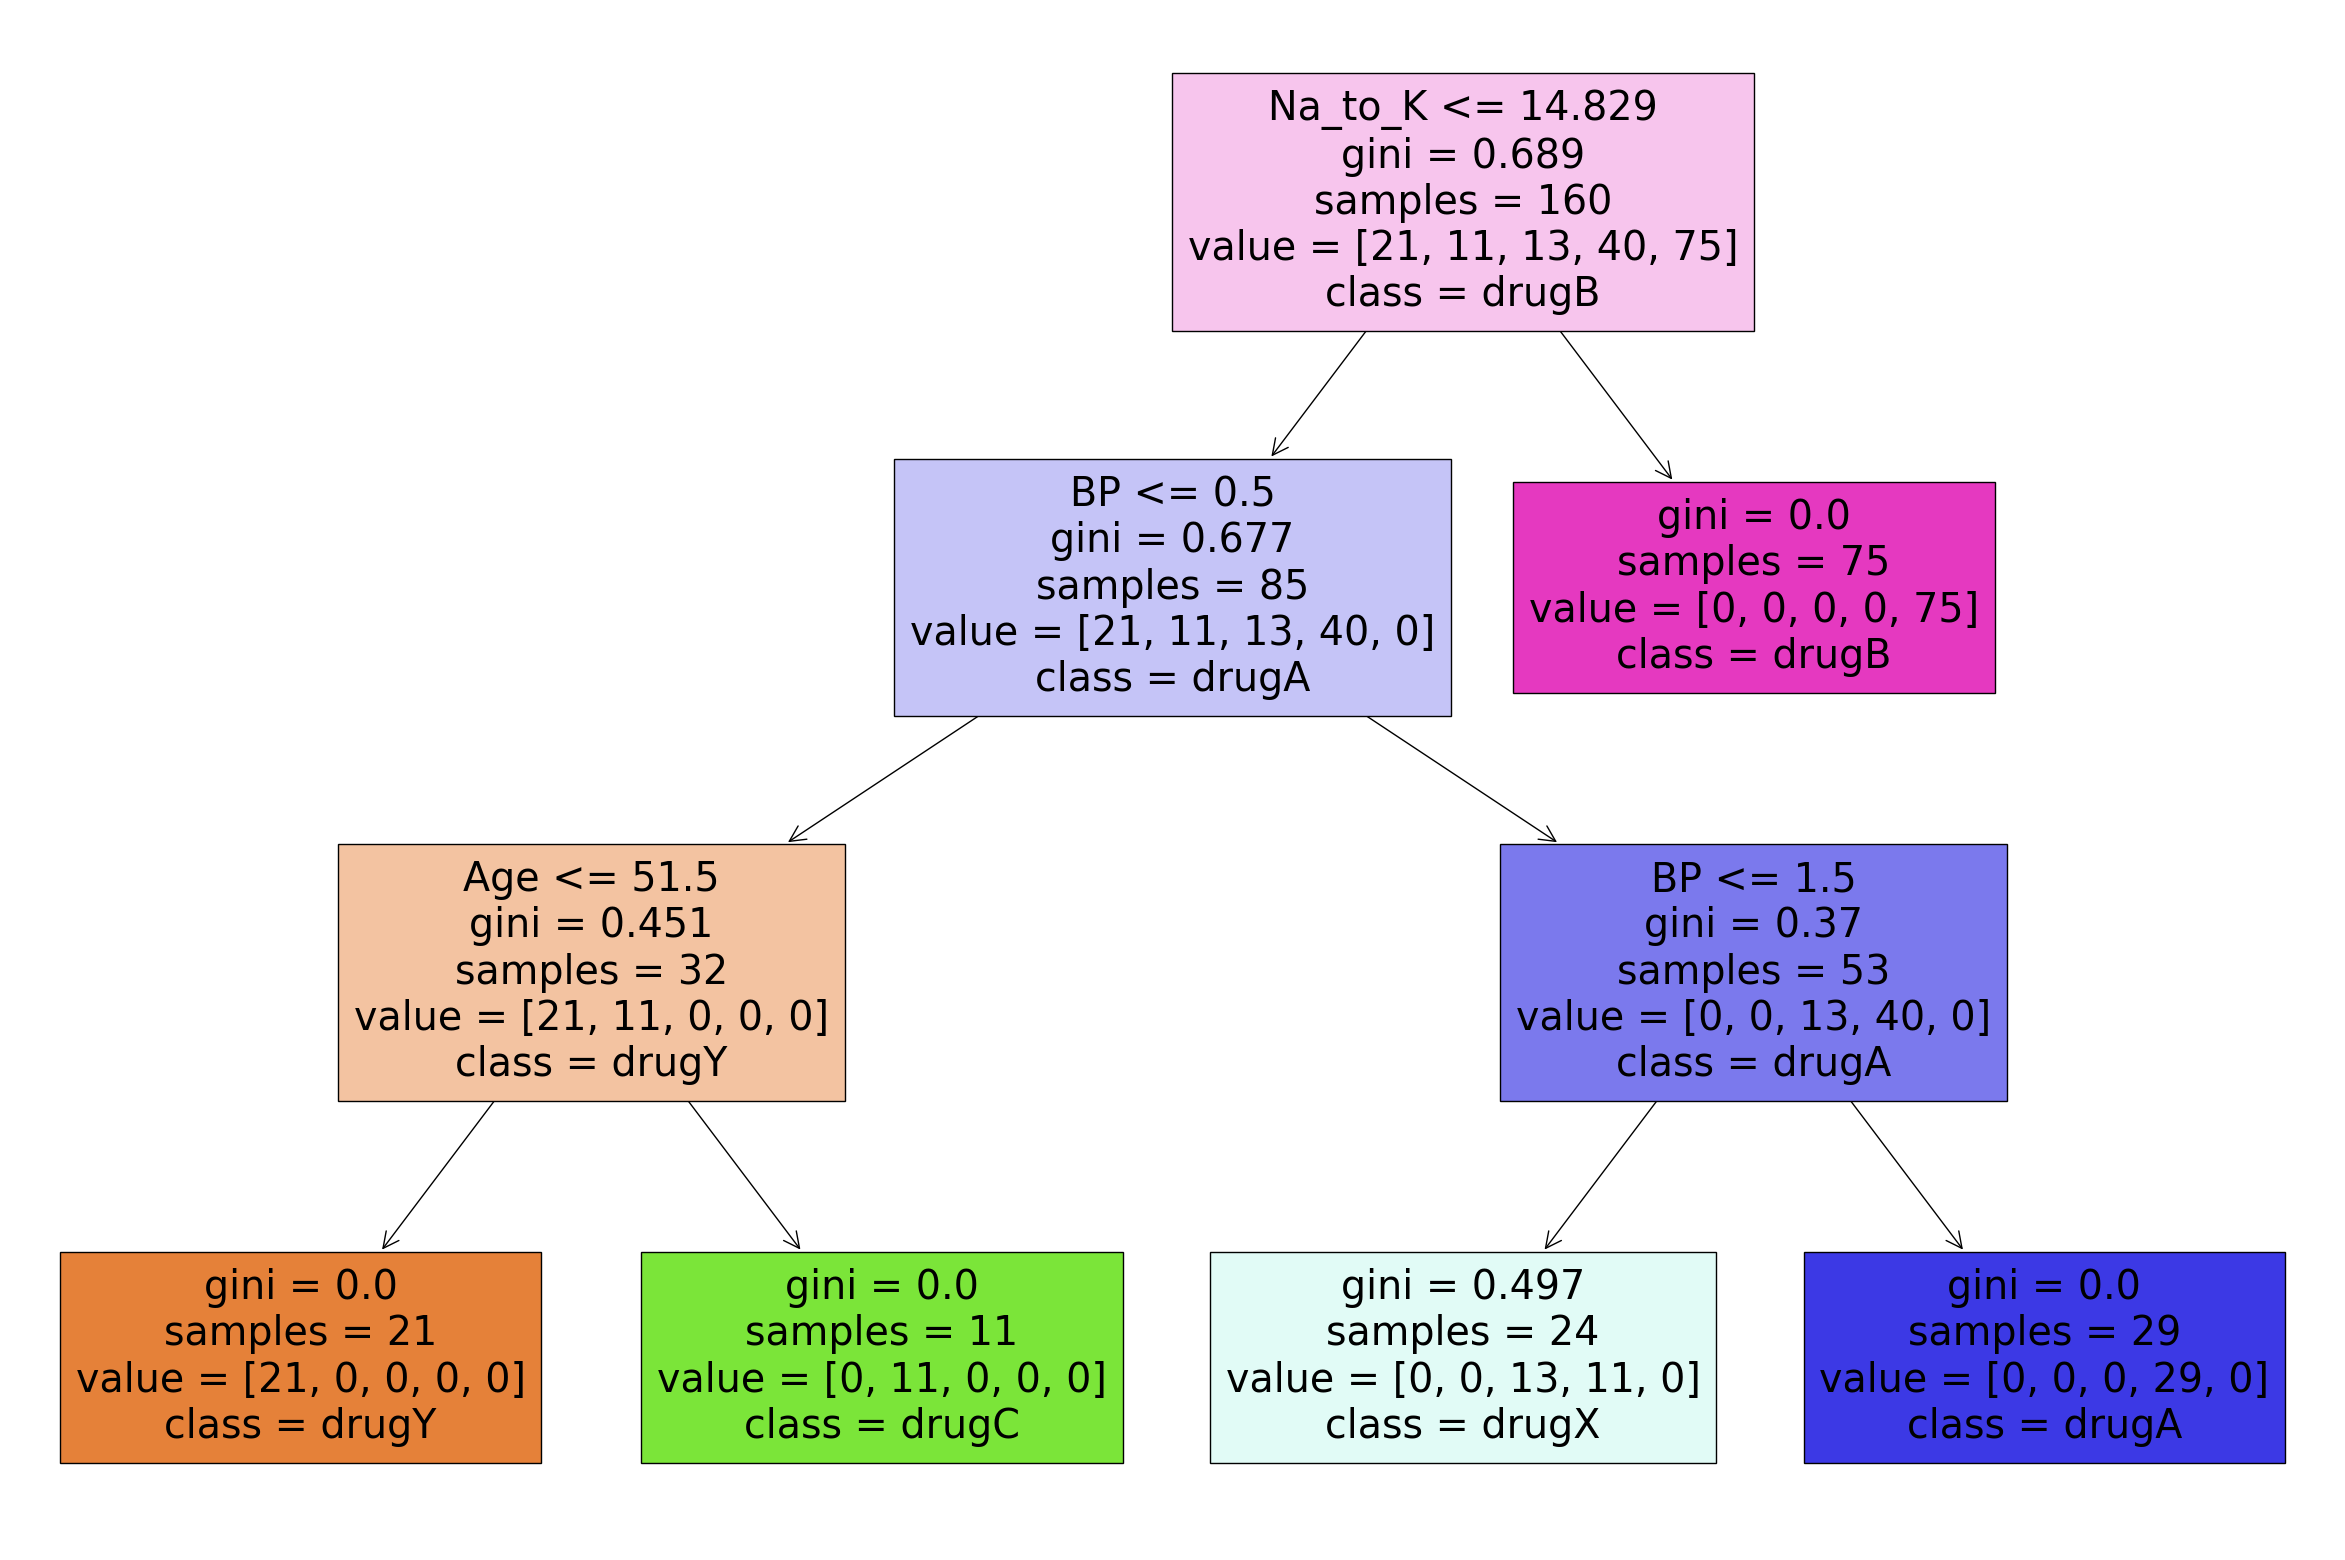

In [15]:
tree_model = tree.DecisionTreeClassifier(min_impurity_decrease=0, max_depth=3)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
print("Decision Tree model accuracy:", metrics.accuracy_score(y_test, y_pred))

plt.figure(figsize=[30, 20])
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

#### **`min_samples_leaf`: *int or float, default=1***
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least `min_samples_leaf` training samples in each of the left and right branches.
This may have the effect of smoothing the model, especially in regression.

Decision Tree model accuracy: 0.8


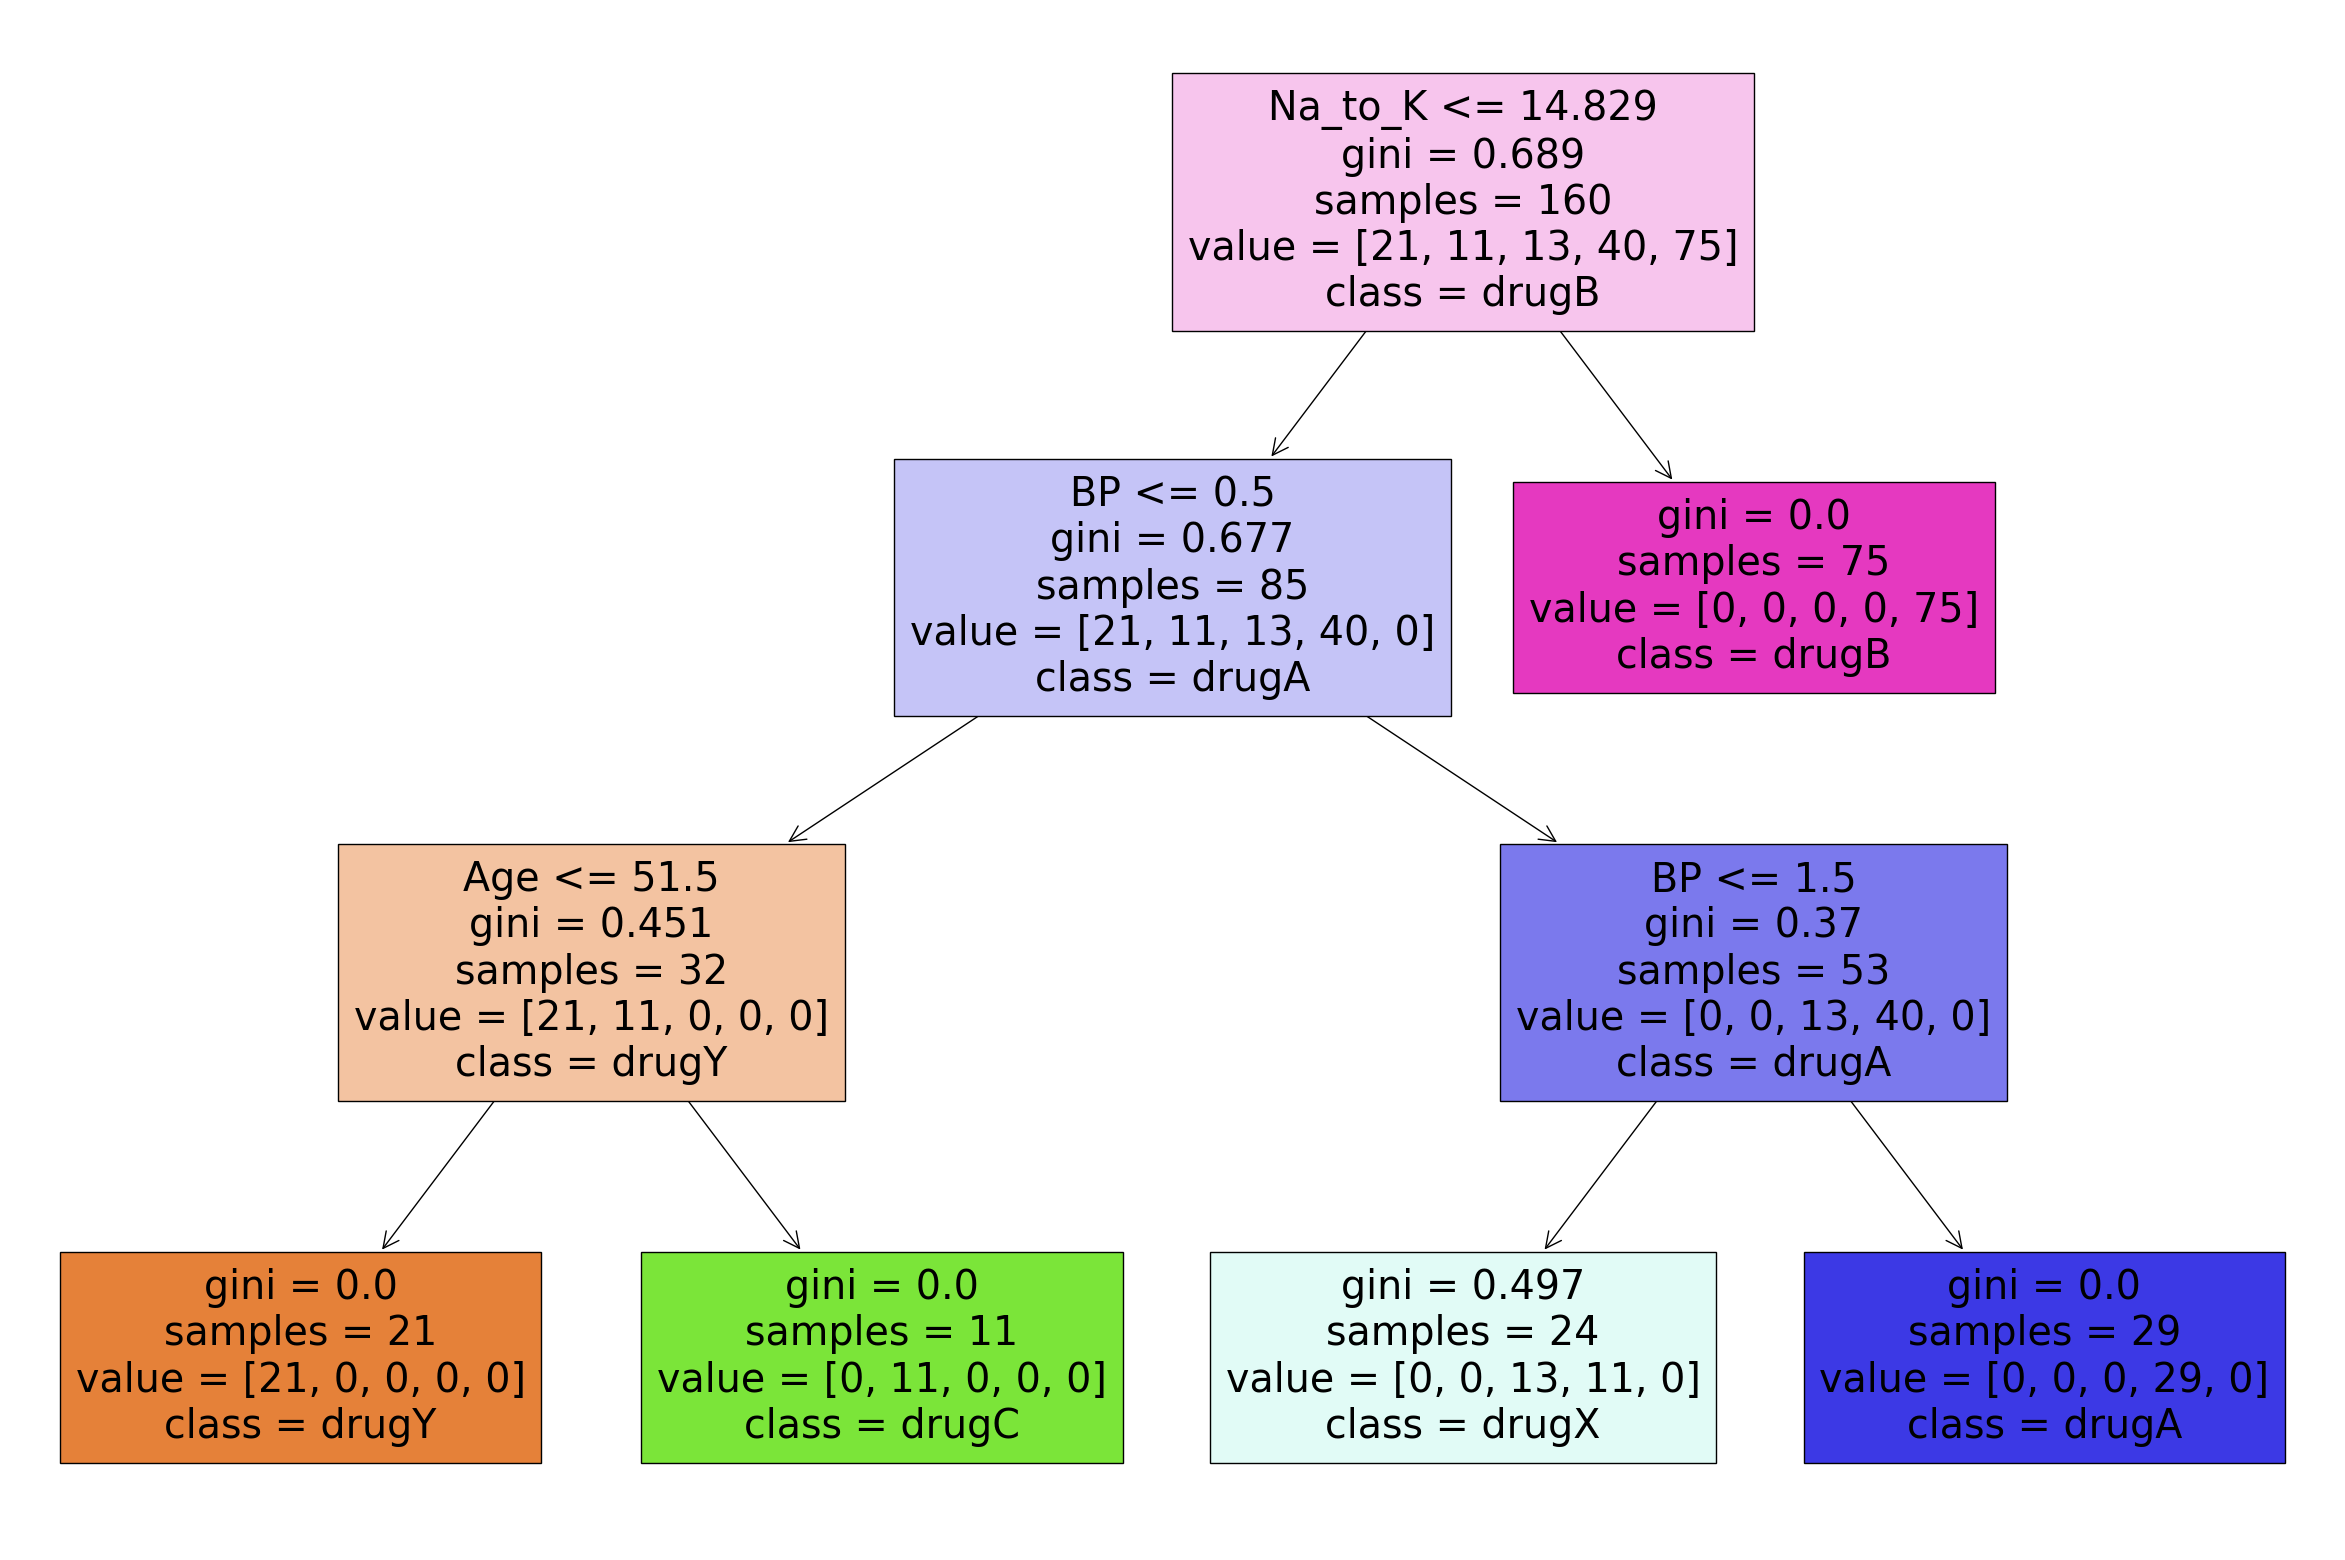

In [16]:
tree_model = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
print("Decision Tree model accuracy:", metrics.accuracy_score(y_test, y_pred))

plt.figure(figsize=[30, 20])
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

### RandomForestClassifier

**Hyperparameters:** https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier

#### **`n_estimators`:*int:, default=100***
The number of trees in the forest.

In [17]:
rf_model = RandomForestClassifier(n_estimators=20)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       0.67      1.00      0.80         2
       drugB       1.00      0.80      0.89         5
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        14
       drugY       1.00      1.00      1.00        16

    accuracy                           0.97        40
   macro avg       0.93      0.96      0.94        40
weighted avg       0.98      0.97      0.98        40



In [18]:
print("Random Forest model accuracy:", metrics.accuracy_score(y_test, y_pred))

Random Forest model accuracy: 0.975
